In [9]:
import numpy as np
import pandas as pd
import MelodyMachine as MM
from re import findall
from scipykit.mtp_initializer import *
PI = np.pi

plt.plot()
plt.ioff()
plt.close()

%load_ext autoreload
%autoreload 1
%aimport MelodyMachine, MelodyMachine.miditools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fifths_circle = ['C','G','D','A','E','B','F#;Gb','C#;Db','G#;Ab','D#;Eb','A#;Bb','F']


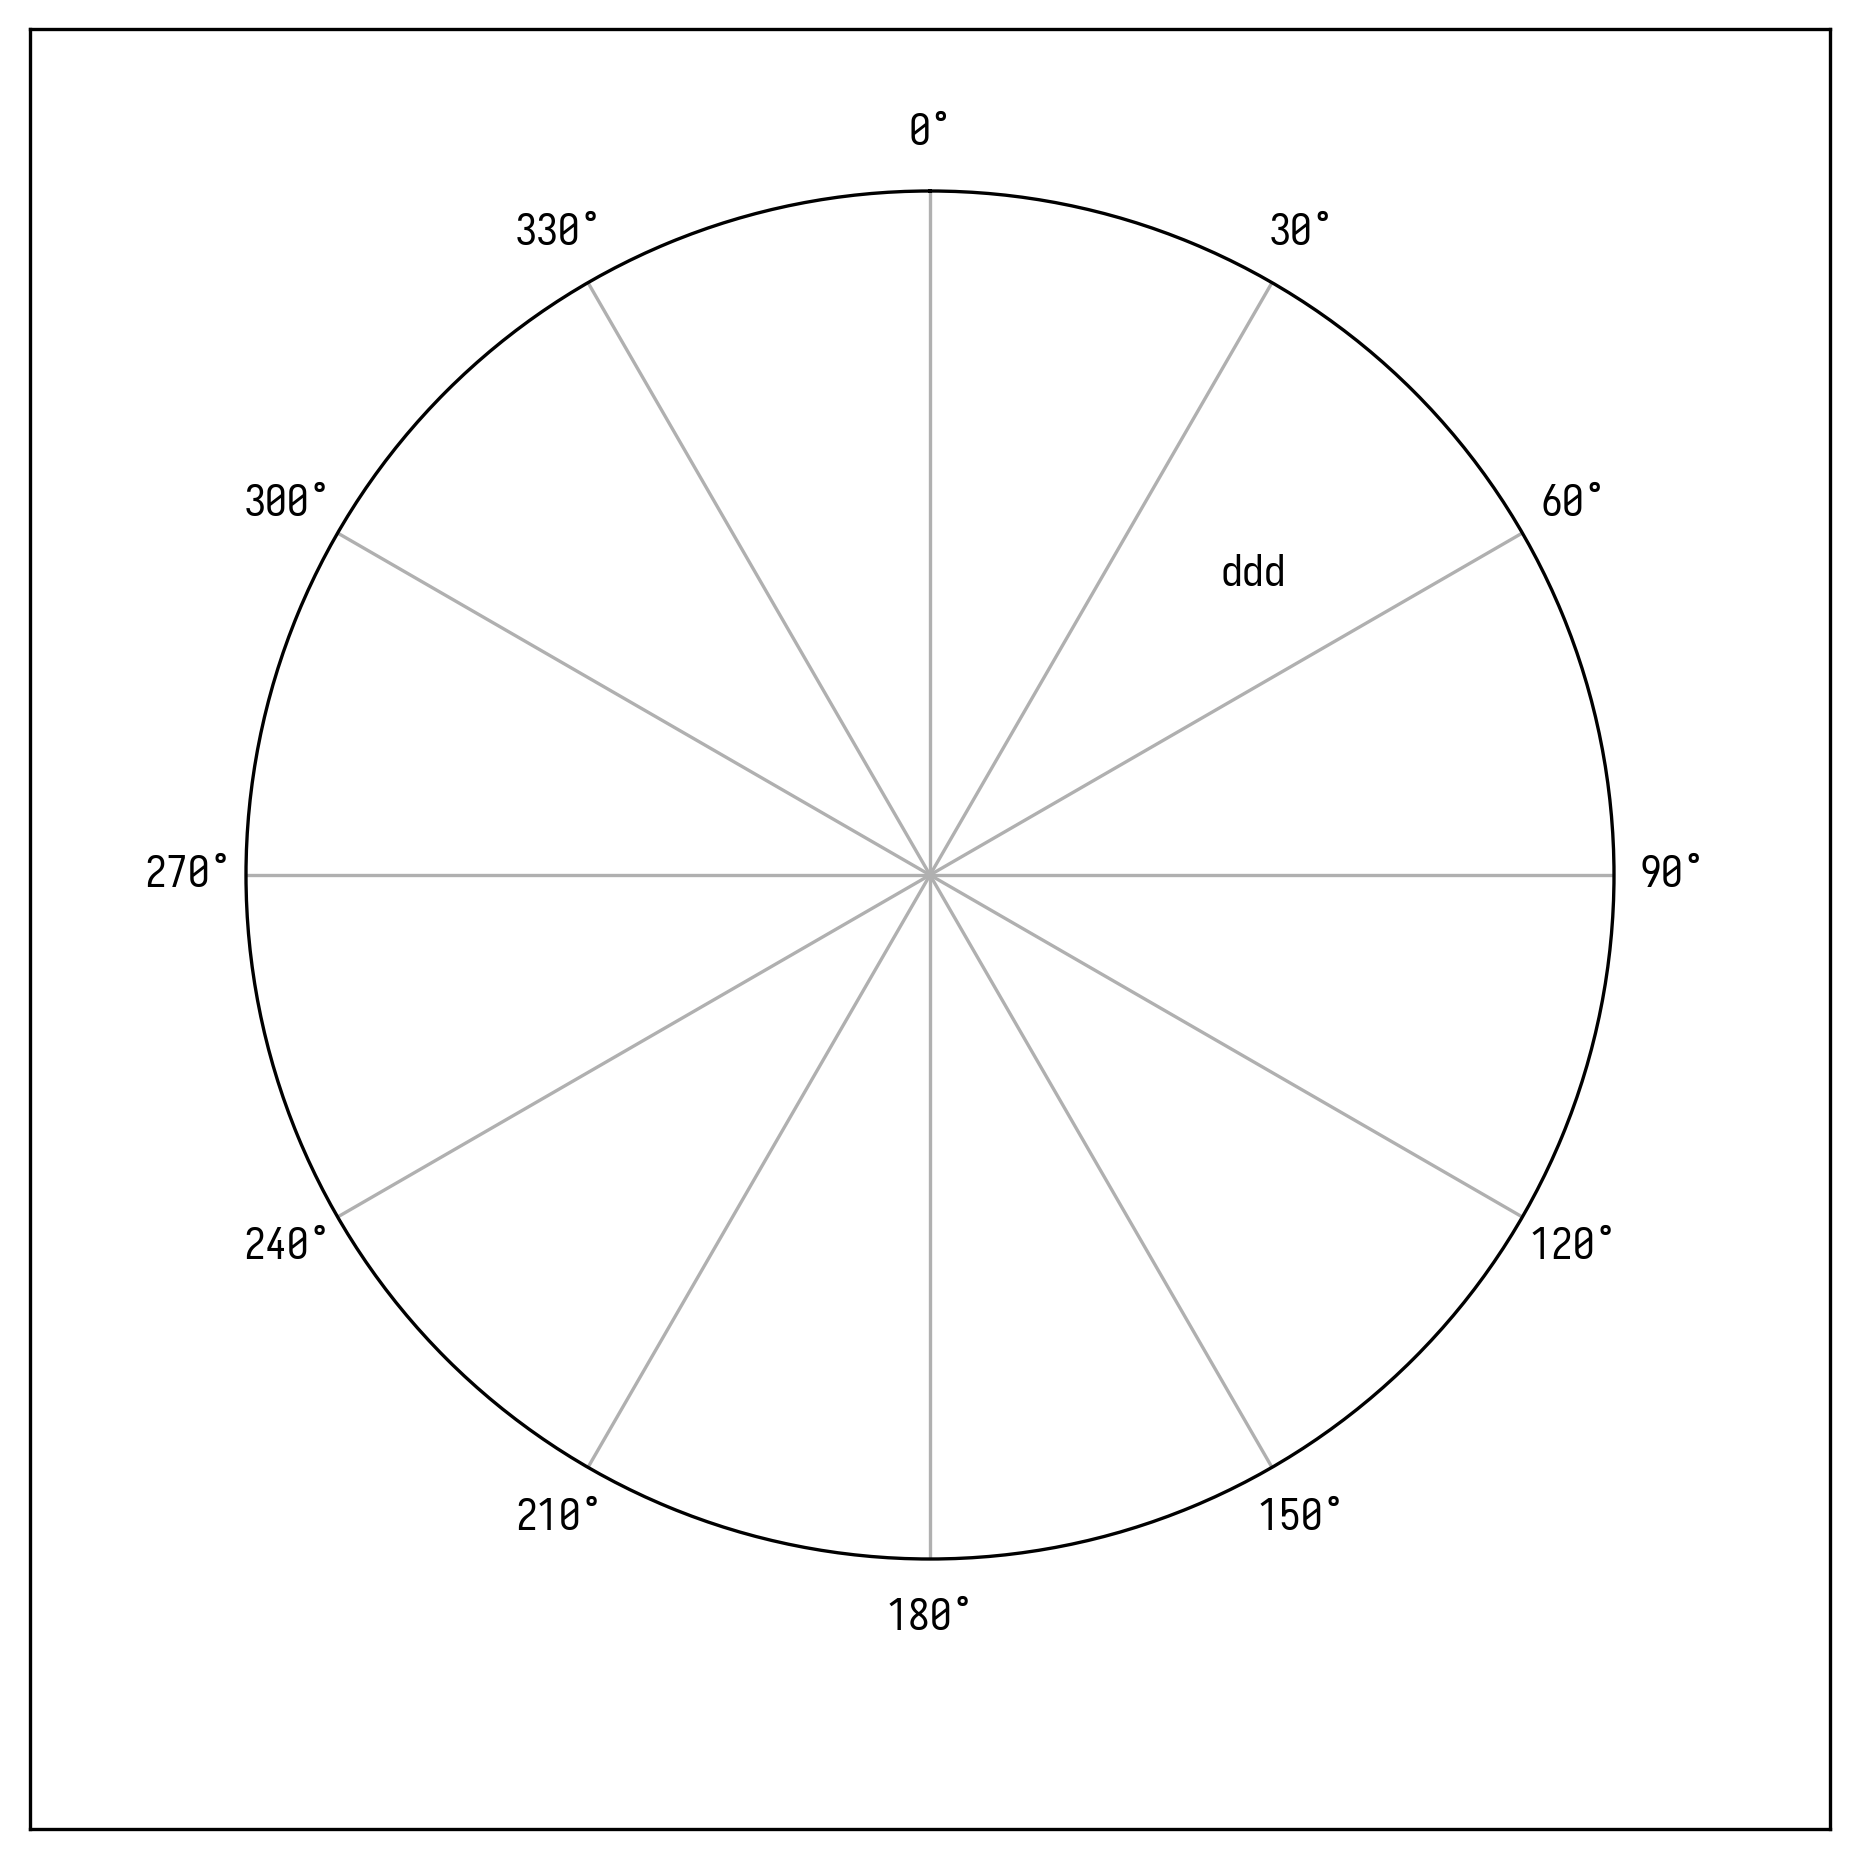

In [23]:
plt.close()
fig = mfigure((6, 6), alpha=1)
ax: PolarAxes = fig.add_subplot(1, 1, 1, projection='polar')

ax.text(np.deg2rad(45), 0.6, 'ddd')

ax.set_theta_offset(np.deg2rad(90))
ax.set_rlabel_position(0)  # 极轴标记所在角度
ax.set_rlim([0, 1])
ax.set_rgrids([0, 0.8])  # 极轴网格，等效上面的yticks
# ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# ax.axis('off')
# ax.set_xticks(np.linspace(0, 2 * PI, len(fifths_circle), endpoint=False))
ax.set_thetagrids(
    np.linspace(0, 360, len(fifths_circle), endpoint=False)
    )  # 角度网格
ax.set_theta_direction(-1)  # 朝向
disp(fig)

<img class="center" src="assets/image.png" width=40%>

In [2]:
def parse_note(n: str):
    '''
    获得midi音高
    '''
    tmp = findall('^\s*(\S)\s*([#b])*\s*(\d*)\s*$', n)
    return tmp


arr_note = ['C0','G', 'C5', 'G#5', 'Ab13', ' G ', ' C 5 ', ' G # 5 ', ' A b 13 ']
for n in arr_note:
    print(parse_note(n))
    print(MM.note2pitch(n))

[('C', '', '0')]
0
[('G', '', '')]
67
[('C', '', '5')]
60
[('G', '#', '5')]
68
[('A', 'b', '13')]
164
[('G', '', '')]
67
[('C', '', '5')]
60
[('G', '#', '5')]
68
[('A', 'b', '13')]
164


In [2]:
df = MM.CHORD_DB.copy()

In [3]:
df

,和弦标记,名称,优先级,音程,度数,组成音数,音程结构,记号,音高集合
0,M,major,90,"0,4,7","1P,3M,5P",3,Major,"M,^,",2192
1,m,minor,90,"0,3,7","1P,3m,5P",3,Minor,"m,min,-",2320
2,7,dominant seventh,90,"0,4,7,10","1P,3M,5P,7m",4,Major,"7,dom",2194
3,5,fifth,85,"0,7","1P,5P",2,Unknown,5,2064
4,Madd9,-,70,"0,4,7,14","1P,3M,5P,9M",4,Major,"Madd9,2,add9,add2",2704
...,...,...,...,...,...,...,...,...,...
101,9#11b13,-,0,"0,4,7,10,14,18,20","1P,3M,5P,7m,9M,11A,13m",7,Major,"9#11b13,9b5b13",2746
102,13#11,-,0,"0,4,7,10,14,18,21","1P,3M,5P,7m,9M,11A,13M",7,Major,"13#11,13+4,13#4",2742
103,M13#11,-,0,"0,4,7,11,14,18,21","1P,3M,5P,7M,9M,11A,13M",7,Major,"M13#11,maj13#11,M13+4,M13#4",2741
104,7#9#11b13,-,0,"0,4,7,10,15,18,20","1P,3M,5P,7m,9A,11A,13m",7,Major,7#9#11b13,2490


In [4]:
arr_chord = MM.chord_progression([
    ['C4', 'E4', 'G4'],
    ['G4', 'C5', 'E5', 'C6'],
    ['E', 'F#', 'B'],
    ['D', 'G'],
    ['B', 'E', 'F#'],
    ['C', 'D', 'E', 'G'],
    ['G', 'F', 'A', 'B'],
    ['G', 'B', 'D', 'Eb'],
    ])
a = MM.note2pitch(arr_chord)
for shift in range(3):
    detections = MM.detect_chord(a, shift)
    print(
        f'series: {shift}', [det['chord name'] for det in detections], '\n'
        )

series: 0 ['CM', 'CM /G', 'Esus2', 'G5 /D', 'Bsus4', 'CMadd9', 'G9no5', 'D#M7b6 /G'] 

series: 1 ['C7', 'CM /G', 'Bsus4 /E', 'GM /D', 'Esus2 /B', 'Em7#5 /C', 'G9b13', 'D#maj7#5 /G'] 

series: 2 ['CMadd9', 'C7 /G', 'EMadd9', 'Gm /D', 'EMadd9 /B', 'C6/9', 'A9b13 /G', 'G7b6'] 



In [99]:
with open('C:/Users/Gray/Desktop/output.txt') as f:
    data = f.read()
data

'起始和弦：[48 55 59 74 76], (C G B D E)\nt = 4.0,  s = 5,  vec = [122230],  d = [1, 2, 2, 3]\nn = 5,  m = 5,  n/m = 1.00,  h = 0.00,  g = 51%,  根音：C (r = 0)\n\n生成结果：\n和弦进行 #1:\n-> [48 55 59 76], (C G B E)\nk = 0.0,  kk = 0.10,  c = 4,  ss = 5,  sv = 2,  v = [0, 0, 0, 2, 0]\nt = 2.5,  s = 5,  vec = [101220],  d = [1, 4, 3]\nn = 4,  m = 4,  n/m = 1.00,  h = 0.00,  g = 41%,  根音：C (r = 0)\nQ = 0.0,  x = 95%,  dr = 0,  dn = -1,  dt = -1.5,  ds = 0,  dg = -10%\n\n和弦进行 #2:\n-> [48 55 59 62 76], (C G B D E)\nk = 0.0,  kk = -0.10,  c = 4,  ss = 5,  sv = 3,  v = [0, 0, 0, 3, 0]\nt = 4.2,  s = 5,  vec = [122230],  d = [1, 2, 2, 3]\nn = 5,  m = 5,  n/m = 1.00,  h = 0.00,  g = 43%,  根音：C (r = 0)\nQ = 0.0,  x = 92%,  dr = 0,  dn = 1,  dt = 1.7,  ds = 0,  dg = 2%\n\n和弦进行 #3:\n-> [48 52 55 59 74], (C E G B D)\nk = 0.0,  kk = 0.00,  c = 3,  ss = 5,  sv = 12,  v = [0, -3, -4, -3, -2]\nt = 4.4,  s = 5,  vec = [122230],  d = [1, 2, 2, 3]\nn = 5,  m = 5,  n/m = 1.00,  h = 0.00,  g = 37%,  根音：C (r = 0)\nQ = 0.0

In [100]:
arr_chord_p = MM.chord_progression([[np.int8(pit) for pit in mat.split(' ')] for mat in findall('-> \[(.+?)\],', data)])
arr_chord_p

[array([48, 55, 59, 76], dtype=int8),
 array([48, 55, 59, 62, 76], dtype=int8),
 array([48, 52, 55, 59, 74], dtype=int8),
 array([52, 55, 62, 71], dtype=int8),
 array([50, 52, 57, 65, 72], dtype=int8),
 array([52, 60, 67, 69], dtype=int8),
 array([55, 62, 65, 71], dtype=int8),
 array([53, 64, 69, 72], dtype=int8)]

In [48]:
list(MM.chain(*(i for i in [[{123},{234}],[{567}]])))

[{123}, {234}, {567}]

In [11]:
midi_fp='D:/Music/FL Project/工程_流行/弗拉门戈弦乐v1.0/弗拉门戈弦乐_20240811_TUO.mid'
mtracks = MM.miditools.MTracks()
mtracks._parse_midifile(midi_fp)
mtracks.__dict__

{'bpM': 136.0}

In [13]:
tmp=mtracks['LABS Chord']
tmp

array([[   40.,   100.,  4224.,  4512.,   288.],
       [   59.,   100.,  4224.,  4512.,   288.],
       [   52.,   100.,  4224.,  4512.,   288.],
       [   52.,   100.,  4512.,  4560.,    48.],
       [   59.,   100.,  4512.,  4560.,    48.],
       [   40.,   100.,  4512.,  4560.,    48.],
       [   53.,   100.,  4560.,  4896.,   336.],
       [   60.,   100.,  4560.,  4896.,   336.],
       [   41.,   100.,  4560.,  4896.,   336.],
       [   53.,   100.,  4896.,  4944.,    48.],
       [   60.,   100.,  4896.,  4944.,    48.],
       [   41.,   100.,  4896.,  4944.,    48.],
       [   52.,   100.,  4944.,  5280.,   336.],
       [   59.,   100.,  4944.,  5280.,   336.],
       [   40.,   100.,  4944.,  5280.,   336.],
       [   52.,   100.,  5280.,  5328.,    48.],
       [   59.,   100.,  5280.,  5328.,    48.],
       [   40.,   100.,  5280.,  5328.,    48.],
       [   43.,   100.,  5328.,  5664.,   336.],
       [   62.,   100.,  5328.,  5664.,   336.],
       [   55.,   10

In [75]:
model = MM.miditools.DBSCAN(eps=1, min_samples=2)
model.fit(tmp[:, [2, 4]])
chords = {i: [] for i in range(1 + max(model.labels_))}
# print(chords)
for i, note in enumerate(tmp):
    # print(i,note)
    chords[model.labels_[i]].append(note[0])
chords = MM.chord_progression(list(chords.values()))
print(MM.pitch2note(chords))
detections = MM.detect_chord(chords)
[det['chord name'] for det in detections]

[array(['E3', 'B4', 'E4'], dtype='<U4'), array(['E4', 'B4', 'E3'], dtype='<U4'), array(['F4', 'C5', 'F3'], dtype='<U4'), array(['F4', 'C5', 'F3'], dtype='<U4'), array(['E4', 'B4', 'E3'], dtype='<U4'), array(['E4', 'B4', 'E3'], dtype='<U4'), array(['G3', 'D5', 'G4'], dtype='<U4'), array(['F4', 'C5', 'F3'], dtype='<U4'), array(['E4', 'G#4', 'E3'], dtype='<U4'), array(['E4', 'G#4', 'E3'], dtype='<U4'), array(['F3', 'A4', 'F4'], dtype='<U4'), array(['F3', 'A4', 'F4'], dtype='<U4'), array(['E4', 'G#4', 'E3'], dtype='<U4'), array(['E3', 'G#4', 'E4'], dtype='<U4'), array(['G#4', 'E4', 'B4', 'G#3'], dtype='<U4'), array(['E5', 'G#4', 'E3', 'E4'], dtype='<U4'), array(['G#4', 'E5', 'E4', 'E3'], dtype='<U4'), array(['A4', 'F4', 'F5', 'F3'], dtype='<U4'), array(['A4', 'F4', 'F5', 'F3'], dtype='<U4'), array(['G#4', 'E4', 'E5', 'E3'], dtype='<U4'), array(['G#4', 'E4', 'E5', 'E3'], dtype='<U4'), array(['G#5', 'G#4', 'G#3', 'B4', 'E4'], dtype='<U4'), array(['E5', 'A5', 'A3', 'A4'], dtype='<U4'), array(

['E5',
 'E5',
 'F5',
 'F5',
 'E5',
 'E5',
 'G5',
 'F5',
 'EM',
 'EM',
 'FM',
 'FM',
 'EM',
 'EM',
 'EM /G#',
 'EM',
 'EM /G#',
 'FM /A',
 'FM /A',
 'EM /G#',
 'EM /G#',
 'EM /G#',
 'A5 /E',
 'GM /D',
 'FM',
 'EM',
 'Am /C',
 'GM /D',
 'FM /C',
 'EM /B']

TypeError: 'dict_valueiterator' object is not subscriptable

In [61]:
isinstance(chords[0][0], np.number)

True

In [15]:
%%HTML

<style>
h1,h2,h3,p,code,ul,ol,body {
    /* --vscode-font-family: "Sarasa Mono SC"; */
    font-family: "Inconsolata","Sarasa Mono SC";
    }

img.center {
    display: flex;
    align-self: center;
    justify-self: center;
    align-items: center;
    justify-content: center;
}
</style>